In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine_info = load_wine()
X = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)
y = pd.Categorical.from_codes(wine_info.target, wine_info.target_names)

In [3]:
X.shape


(178, 13)

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
wine_info.target_names 


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
df = X.join(pd.Series(y, name='class'))
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [7]:
feature_means1 = pd.DataFrame(columns=wine_info.target_names)
for c, rows in df.groupby('class'):
    feature_means1[c] = rows.mean()
feature_means1

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [8]:
withinclass_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)

In [9]:
s = np.zeros((13,13))
for index, row in rows.iterrows():
    x = row.values.reshape(13,1)
    mc = feature_means1[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)

withinclass_scatter_matrix += s

In [10]:
feature_means2 = df.mean()
betweenclass_scatter_matrix = np.zeros((13,13))
for c in feature_means1:    
    n = len(df.loc[df['class'] == c].index)
    mc= feature_means1[c].values.reshape(13,1)
    
    m = feature_means2.values.reshape(13,1)
    betweenclass_scatter_matrix += n * ((mc - m).dot((mc - m).T))

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(withinclass_scatter_matrix).dot(betweenclass_scatter_matrix))

In [12]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
for pair in eigen_pairs:
    print(pair[0])

237.46123198302251
46.98285938758684
1.0071457092992053e-14
9.257305248209307e-15
9.257305248209307e-15
8.388087322616956e-15
8.388087322616956e-15
7.439598232196409e-15
7.105427357601002e-15
5.5270433288224486e-15
5.5270433288224486e-15
1.5939319649034697e-15
2.421231721682941e-16


In [13]:
sum_of_eigen_values = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(eigen_pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/sum_of_eigen_values).real))

Explained Variance
Eigenvector 0: 0.8348256799387275
Eigenvector 1: 0.1651743200612724
Eigenvector 2: 3.540751029301465e-17
Eigenvector 3: 3.254525416085276e-17
Eigenvector 4: 3.254525416085276e-17
Eigenvector 5: 2.948940609804373e-17
Eigenvector 6: 2.948940609804373e-17
Eigenvector 7: 2.6154870000457026e-17
Eigenvector 8: 2.498004906118145e-17
Eigenvector 9: 1.9431035822154324e-17
Eigenvector 10: 1.9431035822154324e-17
Eigenvector 11: 5.603674019815359e-18
Eigenvector 12: 8.512153337466437e-19


In [14]:
X_lda = np.array(X.dot(X.T))

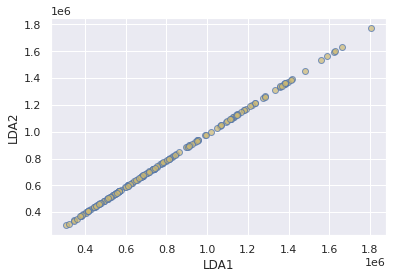

In [15]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_lda[:,0],X_lda[:,1],c='y',cmap='rainbow',alpha=0.7,edgecolors='b')
plt.show()